In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
%matplotlib inline

## Scikit-Learn & Linear Regression

The dataset we will be using for this exercise is to indicate %'s of world development indicators.  These can be a positive indicator or a negative indicator.  What we ultimately want to learn is can we predict any columns based on values from other columns (aka. finding correlation in the data).

Let's read in some data first

In [5]:
country_data = pd.read_csv("world_data.csv") \
                .rename(columns={'\ufeffCountry Name': "Country Name"}) \
                .dropna(thresh=2)
country_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1070 entries, 0 to 1069
Data columns (total 6 columns):
Country Name     1070 non-null object
Country Code     1070 non-null object
Series Name      1070 non-null object
Series Code      1070 non-null object
2000 [YR2000]    928 non-null float64
2013 [YR2013]    445 non-null float64
dtypes: float64(2), object(4)
memory usage: 58.5+ KB


In [6]:
country_data.head()

,Country Name,Country Code,Series Name,Series Code,2000 [YR2000],2013 [YR2013]
0,Afghanistan,AFG,"School enrollment, secondary (% gross)",SE.SEC.ENRR,NaN,54.310841
1,Afghanistan,AFG,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,54.848561,60.931415
2,Afghanistan,AFG,Improved sanitation facilities (% of populatio...,SH.STA.ACSN,23.200000,NaN
3,Afghanistan,AFG,Improved water source (% of population with ac...,SH.H2O.SAFE.ZS,22.100000,NaN
4,Afghanistan,AFG,"Immunization, measles (% of children ages 12-2...",SH.IMM.MEAS,27.000000,75.000000


Pivot the table to group countries over to the index while setting the columns from the `Series Name` with the values from the Y2k

In [7]:
indicators = country_data.pivot_table(index="Country Name", 
                                      columns="Series Name", 
                                      values="2000 [YR2000]")
indicators.head()

Series Name,"Immunization, measles (% of children ages 12-23 months)",Improved sanitation facilities (% of population with access),Improved water source (% of population with access),"Life expectancy at birth, total (years)","School enrollment, secondary (% gross)"
Country Name,,,,,
Afghanistan,27,23.2,22.1,54.848561,NaN
Albania,95,83.8,96.5,74.272073,66.67894
Algeria,80,92.2,89.4,68.930195,61.92001
American Samoa,NaN,61.5,97.8,NaN,NaN
Andorra,97,100.0,100.0,NaN,NaN


For now we want to narrow our scope down to just a single X and a single Y.  This should make it easy to visualize.

In [8]:
indicators[['School enrollment, secondary (% gross)',
            'Life expectancy at birth, total (years)']].dropna(thresh=2).head()

Series Name,"School enrollment, secondary (% gross)","Life expectancy at birth, total (years)"
Country Name,,
Albania,66.678940,74.272073
Algeria,61.920010,68.930195
Angola,14.858310,45.204780
Antigua and Barbuda,77.874542,73.397293
Argentina,86.550858,73.745659


/Users/taddeimania/Developer/class-notes/Notebooks/week-5/.direnv/python-3.5.0/lib/python3.5/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


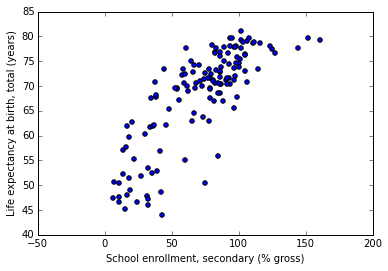

In [9]:
indicators.plot(kind="scatter", 
                x="School enrollment, secondary (% gross)", 
                y="Life expectancy at birth, total (years)")

Now how about a little scikit-learn!?

In [10]:
from sklearn import linear_model

Lets get our X and Y

 - X -> School Enrollment in secondary level education
 - Y -> Life Expectancy at birth

In [14]:
df = indicators.loc[:, ['School enrollment, secondary (% gross)', 
                        'Life expectancy at birth, total (years)']]
df.dropna(inplace=True)
input_data = df[['School enrollment, secondary (% gross)']]
life_expectancy = df['Life expectancy at birth, total (years)']

Create a new `LinearRegression` classifier and fit our data (from above) into our model.

We can print relevant data to this model once our model has been fit.

In [18]:
regr1 = linear_model.LinearRegression()

regr1.fit(input_data, life_expectancy)
print('Coefficients: \n', regr1.coef_)
# The mean square error
print("Residual sum of squares: %.2f"
      % np.mean((regr1.predict(input_data) - life_expectancy) ** 2))
# Explained variance score: 1 is perfect prediction
print('Variance Score: %.2f' % regr1.score(input_data, life_expectancy))


Coefficients: 
 [ 0.24258833]
Residual sum of squares: 33.66
Variance Score: 0.65


# Plotting

Lets create a plot figure of just our scatter plot and overlay our regression line that our model has created based on our data.

/Users/taddeimania/Developer/class-notes/Notebooks/week-5/.direnv/python-3.5.0/lib/python3.5/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


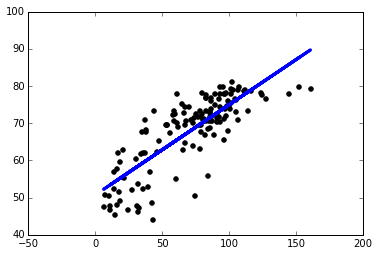

In [21]:
plt.scatter(input_data, life_expectancy,  color='black')
plt.plot(input_data, regr1.predict(input_data), color='blue', linewidth=3)

This is how we can predict specific values on our model:

In [23]:
school_enrollment_percentage = 80

print("Predicted Life Expectancy for School Enrollment % of {}%: ".format(school_enrollment_percentage),
      regr1.predict(school_enrollment_percentage)[0])

Predicted Life Expectancy for School Enrollment % of 80%:  70.1586891515


A single X and Y are fun and and simple - BUT BORING!  We can create a new DF and create a new X and Y that contain multiple feature vectors.

In the case below we will fit Sanitation Facilities & Access to Water sources with the Life Expectancy. Cool stuff eh?

In [24]:
df = indicators.loc[:, ['Improved sanitation facilities (% of population with access)',
                        'Improved water source (% of population with access)',
                        'Life expectancy at birth, total (years)']]
df.dropna(inplace=True)
input_data = df[['Improved sanitation facilities (% of population with access)',
                 'Improved water source (% of population with access)']]
life_expectancy = df['Life expectancy at birth, total (years)']

Taking our `input_data` and `life_expectancy` from above we can fit a new `LinearRegression` model to our new data and get relevant information about it.

In [25]:
regr2 = linear_model.LinearRegression()
#indicators.loc[:, ['Improved sanitation facilities (% of population with access)']]
fit = regr2.fit(input_data, life_expectancy)
print('Coefficients: \n', regr2.coef_)
print(regr2.score(input_data, life_expectancy))

Coefficients: 
 [ 0.18063297  0.17222788]
0.727755785254


Since we are fitting on multiple dimensions we can even do a 3d plot. 3d Plots don't tell an incredible amount of information to the lay-man but they sure look cool.

/Users/taddeimania/Developer/class-notes/Notebooks/week-5/.direnv/python-3.5.0/lib/python3.5/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


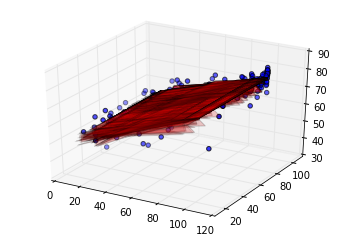

In [26]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
xx = input_data['Improved sanitation facilities (% of population with access)']
yy = input_data['Improved water source (% of population with access)']
zz = life_expectancy
predict = regr2.predict(input_data)
x_surf, y_surf = np.meshgrid(xx, yy)
ax.plot_surface(x_surf, y_surf, predict, color="red", alpha=0.1)
ax.scatter(xx, yy, zz)

### Predicting with multiple input variables

With multiple X's how do we predict on those?  Easy! Pass a feature vector representing %'s of their respective category and our model will predict the life expectancy based on those values.

In [27]:
# ['Improved sanitation facilities (% of population with access)', 
#  'Improved water source (% of population with access)']  as a %

print(regr2.predict([80, 80]))
print(regr2.predict([85, 80]))
print(regr2.predict([80, 85]))
print(regr2.predict([82.5, 82.5]))

[ 68.24205914]
[ 69.14522398]
[ 69.10319853]
[ 69.12421125]


Notice we just multiply the vectors together to get the `xx` variable.  Our `yy` remains as the life expectancy.

/Users/taddeimania/Developer/class-notes/Notebooks/week-5/.direnv/python-3.5.0/lib/python3.5/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


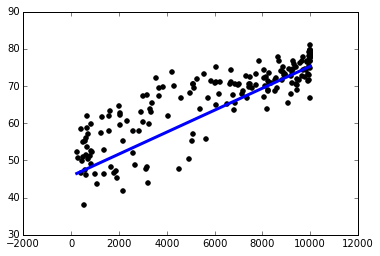

In [28]:
x1 = input_data['Improved sanitation facilities (% of population with access)']
x2 = input_data['Improved water source (% of population with access)']
yy = life_expectancy
predict = regr2.predict(input_data)
xx = x1 * x2
plt.scatter(xx, yy,  color='black')
plt.plot((min(xx), max(xx)), (min(predict), max(predict)), color='blue', linewidth=3)

Adding another dimension is as easy too!  Lets add our school enrollment back in and see how that affects things.

In [30]:
df = indicators.loc[:, ['School enrollment, secondary (% gross)',
                        'Improved sanitation facilities (% of population with access)',
                        'Improved water source (% of population with access)',
                        'Life expectancy at birth, total (years)']]
df.dropna(inplace=True)
input_data = df[['School enrollment, secondary (% gross)', 
                 'Improved sanitation facilities (% of population with access)',
                 'Improved water source (% of population with access)']]
life_expectancy = df['Life expectancy at birth, total (years)']

In [31]:
regr3 = linear_model.LinearRegression()
fit = regr3.fit(input_data, life_expectancy)
print(regr3.score(input_data, life_expectancy))

0.754177780417


What can we precict with this new model?

In [32]:
for i in range(1, 11):
    print("School Enrollment: {}".format(i*10), regr3.predict([i * 10, 100, 100]))
    print("Sanitation Access: {}".format(i*10), regr3.predict([100, i * 10, 100]))
    print("Water Access: {}".format(i*10), regr3.predict([100, 100, i * 10]))
    print("-----\n")

School Enrollment: 10 [ 69.46838844]
Sanitation Access: 10 [ 65.91890932]
Water Access: 10 [ 59.22903565]
-----

School Enrollment: 20 [ 70.18725068]
Sanitation Access: 20 [ 67.03215813]
Water Access: 20 [ 61.08560376]
-----

School Enrollment: 30 [ 70.90611292]
Sanitation Access: 30 [ 68.14540694]
Water Access: 30 [ 62.94217187]
-----

School Enrollment: 40 [ 71.62497516]
Sanitation Access: 40 [ 69.25865576]
Water Access: 40 [ 64.79873998]
-----

School Enrollment: 50 [ 72.34383741]
Sanitation Access: 50 [ 70.37190457]
Water Access: 50 [ 66.65530808]
-----

School Enrollment: 60 [ 73.06269965]
Sanitation Access: 60 [ 71.48515338]
Water Access: 60 [ 68.51187619]
-----

School Enrollment: 70 [ 73.78156189]
Sanitation Access: 70 [ 72.59840219]
Water Access: 70 [ 70.3684443]
-----

School Enrollment: 80 [ 74.50042413]
Sanitation Access: 80 [ 73.711651]
Water Access: 80 [ 72.22501241]
-----

School Enrollment: 90 [ 75.21928638]
Sanitation Access: 90 [ 74.82489981]
Water Access: 90 [ 74.081

In [33]:
df = indicators.loc[:, ['School enrollment, secondary (% gross)',
                        'Immunization, measles (% of children ages 12-23 months)',
                        'Improved sanitation facilities (% of population with access)',
                        'Improved water source (% of population with access)',
                        'Life expectancy at birth, total (years)']]
df.dropna(inplace=True)
input_data = df[['School enrollment, secondary (% gross)', 
                 'Immunization, measles (% of children ages 12-23 months)',
                 'Improved sanitation facilities (% of population with access)',
                 'Improved water source (% of population with access)']]
life_expectancy = df['Life expectancy at birth, total (years)']
regr4 = linear_model.LinearRegression()
fit = regr4.fit(input_data, life_expectancy)
print(regr4.score(input_data, life_expectancy))

0.757823778859


In [34]:
df = indicators.loc[:, ['Immunization, measles (% of children ages 12-23 months)',
                        'Life expectancy at birth, total (years)']]
df.dropna(inplace=True)
input_data = df[['Immunization, measles (% of children ages 12-23 months)']]
life_expectancy = df['Life expectancy at birth, total (years)']
regr4 = linear_model.LinearRegression()
fit = regr4.fit(input_data, life_expectancy)
print(regr4.score(input_data, life_expectancy))

0.487682103559


## Automating picking the best features

In [35]:
import itertools
dependent_vars = list(indicators.columns)
dependent_vars.remove('Life expectancy at birth, total (years)')
combos = list(itertools.combinations(dependent_vars, 2))

In [36]:
combos

[('Immunization, measles (% of children ages 12-23 months)',
  'Improved sanitation facilities (% of population with access)'),
 ('Immunization, measles (% of children ages 12-23 months)',
  'Improved water source (% of population with access)'),
 ('Immunization, measles (% of children ages 12-23 months)',
  'School enrollment, secondary (% gross)'),
 ('Improved sanitation facilities (% of population with access)',
  'Improved water source (% of population with access)'),
 ('Improved sanitation facilities (% of population with access)',
  'School enrollment, secondary (% gross)'),
 ('Improved water source (% of population with access)',
  'School enrollment, secondary (% gross)')]

In [37]:
choices = []

def regression_for(combo):
    combo = list(combo)
    df = indicators.loc[:, combo + ['Life expectancy at birth, total (years)']]
    df.dropna(inplace=True)
    input_data = df[combo]
    life_expectancy = df['Life expectancy at birth, total (years)']
    regr = linear_model.LinearRegression()
    regr.fit(input_data, life_expectancy)
    return regr, regr.score(input_data, life_expectancy)

for combo in combos:
    regr, score = regression_for(combo)
    choices.append((combo, score))
                   
best = sorted(choices, key=lambda x: x[1])[-1]
print(best)
regr, score = regression_for(best[0])
print(regr.coef_, regr.intercept_)

(('Improved water source (% of population with access)', 'School enrollment, secondary (% gross)'), 0.73064421436970339)
[ 0.28184565  0.11643609] 35.7634019124
